In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.charts import Bar
import thinkstats2
import thinkplot
from scipy import stats
output_notebook()

Loading BokehJS ...

In [16]:
def ttest_onesided(high_vita, low_vita, confidence_interval, ttest_variant="welch"):
    # Welch’s t-test, independent variable
    high_vita_name, high_vita_dataset = high_vita
    low_vita_name, low_vita_dataset = low_vita
    
    if ttest_variant == "welch":
        tstat, pval = stats.ttest_ind(high_vita_dataset, low_vita_dataset, equal_var=False)
    elif ttest_variant == "student":
        tstat, pval = stats.ttest_rel(high_vita_dataset, low_vita_dataset)
        
    one_tailed_pval = pval/2
    
    pval_critical = 1 - (confidence_interval / 100)
    if one_tailed_pval < pval_critical:
        print("PVALUE = {} (P-Critical = {})".format(one_tailed_pval, pval_critical))
        print("Tstatistics = {}".format(tstat))
        print("{} is significantly different than {}".format(high_vita_name, low_vita_name))
        if tstat > 0:
            print("{} > {}".format(high_vita_name, low_vita_name))
        elif tstat < 0:
            print("{} < {}".format(high_vita_name, low_vita_name))
    else:
        print("High group is not significantly different")

def calculate_iqr_limit(series):
    q1 = series.quantile(q=0.25)
    q2 = series.quantile(q=0.5)
    q3 = series.quantile(q=0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    print("upper limit = {}".format(upper))
    print("lower limit = {}".format(lower))
    return float(upper), float(lower)

def get_outlier(df, col_name):
    uplim, lowlim = calculate_iqr_limit(df[col_name])
    return df[(df[col_name] < lowlim) | df[col_name] > uplim]

In [31]:
excel_file = pd.ExcelFile("hansan.xlsx")
df = pd.read_excel(excel_file)
df["svg_ca"] = df.CA / 100

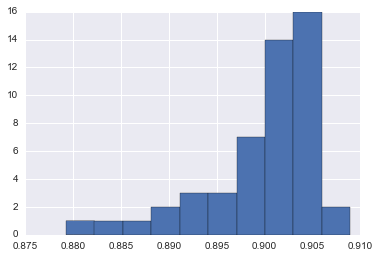

In [34]:
high_vita = df[df.VIT >= 60]
# HIGH VITA ALL REGION OUTLIER REMOVED
high_vita.IPR.hist()

upper limit = 0.9124430973720747
lower limit = 0.8889054708508526
HIGH VITA OUTLIER REMOVED
count    47.000000
mean      0.900666
std       0.004250
min       0.889986
25%       0.898226
50%       0.900935
75%       0.903733
max       0.908953
Name: IPR, dtype: float64
n = 47


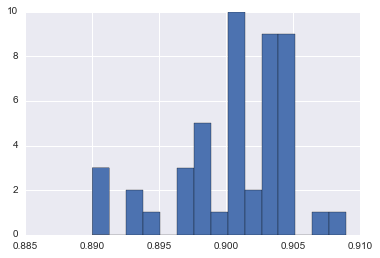

In [33]:
hvar_up_lim, hvar_low_lim = calculate_iqr_limit(high_vita.IPR)
hvar_wo_df = high_vita[(hvar_low_lim <= high_vita.IPR) & (high_vita.IPR <= hvar_up_lim)]
print("HIGH VITA OUTLIER REMOVED")
print(hvar_wo_df.IPR.describe())
hvar_wo_df.IPR.hist(bins=15)
print("n = {}".format(len(hvar_wo_df)))

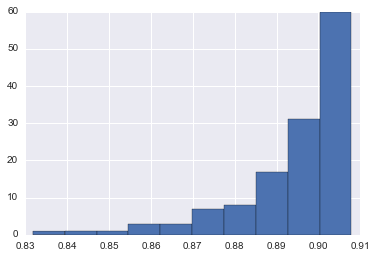

In [19]:
low_vita = df[df.VIT <= 40]
low_vita.IPR.hist()

upper limit = 0.9211568609336472
lower limit = 0.8735196689620931
LOW VITA ALL REGION OUTLIER REMOVED
count    120.000000
mean       0.897511
std        0.008116
min        0.873988
25%        0.893050
50%        0.900320
75%        0.903450
max        0.907887
Name: IPR, dtype: float64
n = 120


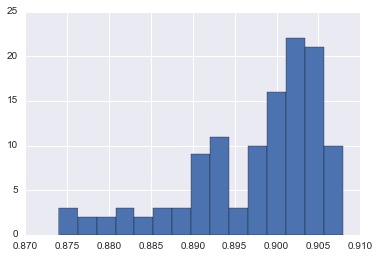

In [35]:
# LOW VITA ALL REGION OUTLIER REMOVED
lvar_up_lim, lvar_low_lim = calculate_iqr_limit(low_vita.IPR)
lvar_wo_df = low_vita[(lvar_low_lim <= low_vita.IPR) & (low_vita.IPR <= lvar_up_lim)]
print("LOW VITA ALL REGION OUTLIER REMOVED")
print(lvar_wo_df.IPR.describe())
lvar_wo_df.IPR.hist(bins=15)
print("n = {}".format(len(lvar_wo_df)))